In [3]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
data = sklearn.datasets.load_iris()
type(data)

sklearn.utils._bunch.Bunch

In [4]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
#df.insert(df.shape[1], "target", data.target, True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

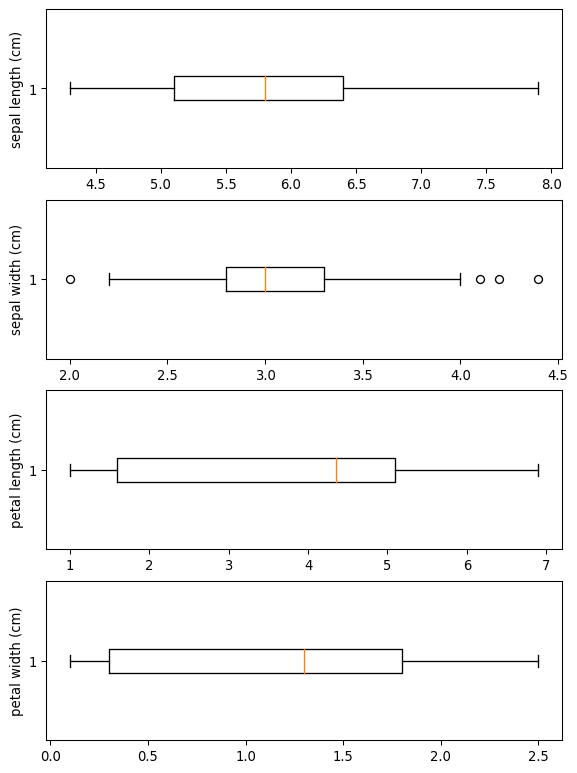

In [8]:
# Box Plots
fig, axs = plt.subplots(4,1,dpi=95, figsize=(7,10))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [9]:
# Set a threshold for outliers (e.g., 2 standard deviations)
threshold = 2

# Initialize an empty DataFrame to store outlier flags for each feature
outliers = pd.DataFrame()

# Calculate Z-scores and detect outliers for each feature
for column in df.columns:
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outlier_flags = (z_scores > threshold) | (z_scores < -threshold)
    outliers[column] = outlier_flags

# Access rows with outliers in specific columns
outlier_rows = df[outliers.any(axis=1)]


outlier_rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0
105,7.6,3.0,6.6,2.1
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3
122,7.7,2.8,6.7,2.0
131,7.9,3.8,6.4,2.0


In [10]:
def NormalizeData(data):
        return (data - np.min(data)) / (np.max(data) - np.min(data)) * np.pi

normalized_df= df.apply(NormalizeData)
normalized_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.698132,1.963495,0.212989,0.130900
1,0.523599,1.308997,0.212989,0.130900
2,0.349066,1.570796,0.159742,0.130900
3,0.261799,1.439897,0.266237,0.130900
4,0.610865,2.094395,0.212989,0.130900
...,...,...,...,...
145,2.094395,1.308997,2.236388,2.879793
146,1.745329,0.654498,2.129893,2.356194
147,1.919862,1.308997,2.236388,2.487094
148,1.658063,1.832596,2.342883,2.879793


In [11]:
normalized_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,1.346812,1.384046,1.468561,1.439024
std,0.722624,0.570548,0.939974,0.997767
min,0.000000,0.000000,0.000000,0.000000
25%,0.698132,1.047198,0.319484,0.261799
50%,1.308997,1.308997,1.783786,1.570796
75%,1.832596,1.701696,2.183141,2.225295
max,3.141593,3.141593,3.141593,3.141593


In [12]:
NUM_FEATURES = df.shape[1]
angleEncoding = QuantumCircuit(NUM_FEATURES)

#Vector for encoding the features
ip = ParameterVector('Features',num_features) 

for i in range(num_features):
    encoder2.rz(ip[i], i)

encoder2.draw('mpl')

NameError: name 'ParameterVector' is not defined

In [13]:
X = normalized_df
y = pd.DataFrame(data.target, columns=["target"])
x_train, x_test, y_train, y_test = train_test_split(X, y)
display(x_train, x_test, y_train, y_test)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
105,2.879793,1.308997,2.981851,2.617994
48,0.872665,2.225295,0.266237,0.130900
61,1.396263,1.308997,1.703915,1.832596
14,1.308997,2.617994,0.106495,0.130900
103,1.745329,1.178097,2.449377,2.225295
...,...,...,...,...
10,0.959931,2.225295,0.266237,0.130900
33,1.047198,2.879793,0.212989,0.130900
62,1.483530,0.261799,1.597420,1.178097
29,0.349066,1.570796,0.319484,0.130900


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,2.356194,1.570796,1.970151,1.701696
77,2.094395,1.308997,2.129893,2.094395
97,1.658063,1.178097,1.757162,1.570796
54,1.919862,1.047198,1.916904,1.832596
101,1.308997,0.916298,2.183141,2.356194
38,0.087266,1.308997,0.159742,0.130900
72,1.745329,0.654498,2.076646,1.832596
111,1.832596,0.916298,2.289635,2.356194
83,1.483530,0.916298,2.183141,1.963495
90,1.047198,0.785398,1.810409,1.439897


,target
105,2
48,0
61,1
14,0
103,2
...,...
10,0
33,0
62,1
29,0


,target
50,1
77,1
97,1
54,1
101,2
38,0
72,1
111,2
83,1
90,1


In [489]:
import numpy as np

def approximate_gradient(predictions, targets, loss_function = log_loss, epsilon=1e-6):
    """
    Approximate gradient of a loss function at the input predictions.

    Parameters:
    - loss_function: A function that takes a predictions as input and returns a scalar loss.
    - predictions: The predictions at which to compute the gradient.
    - epsilon: A small value to compute finite differences (default is 1e-6).

    Returns:
    - gradient: An approximate gradient predictions of the same shape as the input predictions.
    """
    predictions = np.asarray(predictions)
    gradient = np.zeros_like(predictions)
    
    for i in range(len(predictions)):
        predictions_plus = np.copy(predictions)
        predictions_minus = np.copy(predictions)

        # Perturb the predictions by adding and subtracting epsilon to the i-th component
        predictions_plus[i] += epsilon
        predictions_minus[i] -= epsilon

        # Calculate the loss for the perturbed predictionss
        loss1 = loss_function(targets, predictions_plus)
        loss2 = loss_function(targets, predictions_minus)

        # Calculate the finite difference for the i-th component
        gradient[i] = (loss1 - loss2) / (2 * epsilon)

    return gradient


k: 0, i: 0
k: 1, i: 1
k: 2, i: 2
k: 3, i: 2, j: 4
k: 4, i: 0
k: 5, i: 1
k: 6, i: 2
k: 7, i: 2, j: 5
k: 8, i: 0
k: 9, i: 1
k: 10, i: 2
k: 11, i: 2, j: 6
k: 12, i: 0
k: 13, i: 1
k: 14, i: 2
k: 15, i: 2, j: 7
k: 16, i: 0
k: 17, i: 1
k: 18, i: 2
k: 19, i: 2, j: 5
k: 20, i: 0
k: 21, i: 1
k: 22, i: 2
k: 23, i: 2, j: 6
k: 24, i: 0
k: 25, i: 1
k: 26, i: 2
k: 27, i: 2, j: 7
ParameterView([Parameter(f_0), Parameter(f_1), Parameter(f_2), Parameter(f_3), Parameter(p_0), Parameter(p_1), Parameter(p_10), Parameter(p_11), Parameter(p_12), Parameter(p_13), Parameter(p_14), Parameter(p_15), Parameter(p_16), Parameter(p_17), Parameter(p_18), Parameter(p_19), Parameter(p_2), Parameter(p_20), Parameter(p_21), Parameter(p_22), Parameter(p_23), Parameter(p_24), Parameter(p_25), Parameter(p_26), Parameter(p_27), Parameter(p_3), Parameter(p_4), Parameter(p_5), Parameter(p_6), Parameter(p_7), Parameter(p_8), Parameter(p_9)])


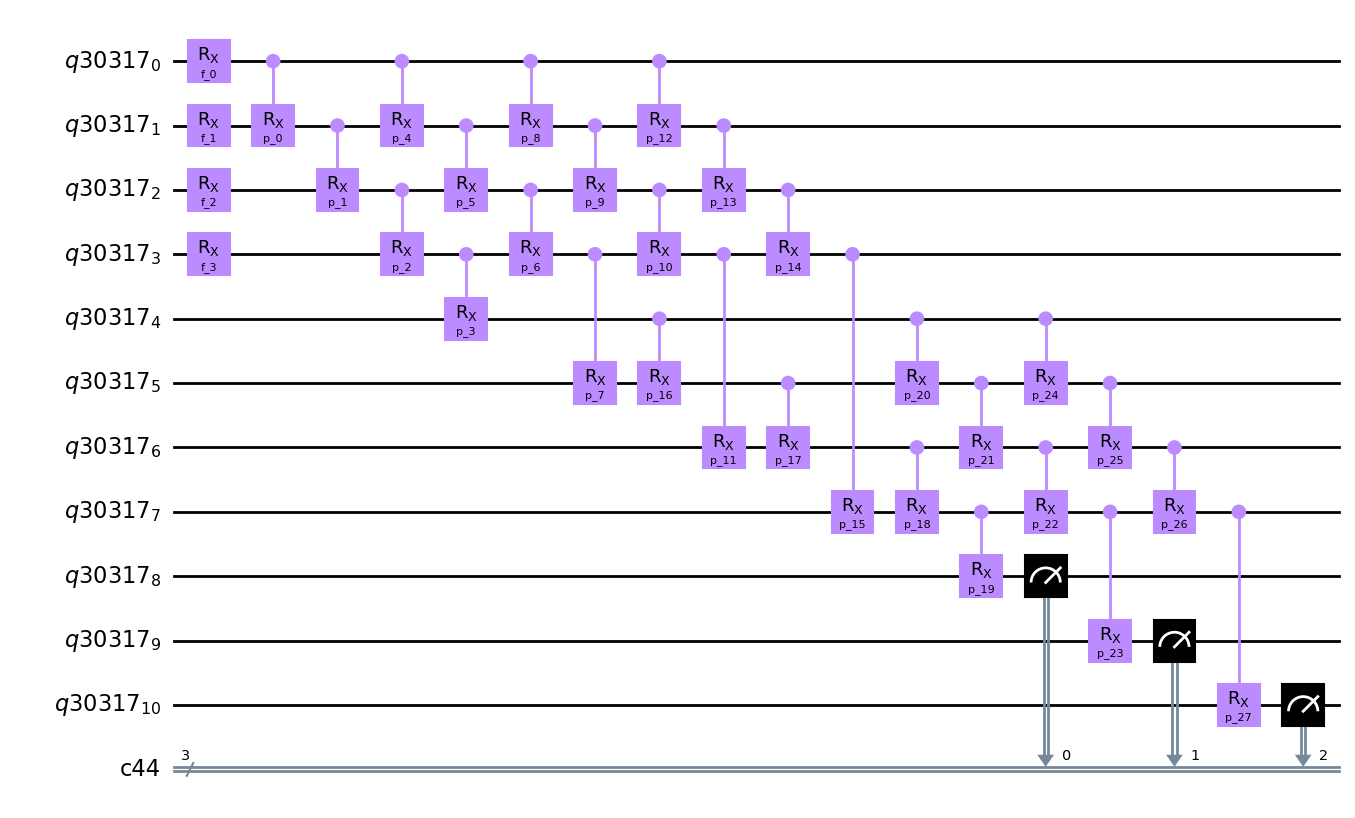

In [490]:
import numpy as np
from qiskit import QuantumCircuit, transpile, execute, Aer, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import CRXGate
from qiskit.circuit import Parameter

q = QuantumRegister(11)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

# Define the input feature vector
features = [Parameter(f'f_{i}') for i in range(4)]

params = [Parameter(f'p_{i}') for i in range(28)]

for i in range(4):
        qc.rx(features[i], i)

k=0
"""# Add parameterized quantum convolution layers
for i in range(3):
    qc.crx(params[k], i, i+1)
    print(f'k: {k}, i: {i}')
    k+=1
    
for j in range(4):
    qc.crx(params[k],i+1,4+j)
    print(f'k: {k}, i: {i}, j: {j+4}')
    k+=1
    
# Add parameterized quantum convolution layers
for i in range(3):
    qc.crx(params[k], i + 4, i+5)
    print(f'k: {k}, i: {i}')
    k+=1
        
for j in range(3):
    qc.crx(params[k], i+5, 8+j)
    print(f'k: {k}, i: {i}, j: {j+5}')
    k+=1"""
for j in range(4):
    # Add parameterized quantum convolution layers
    for i in range(3):
        qc.crx(params[k], i, i+1)
        print(f'k: {k}, i: {i}')
        k+=1
    qc.crx(params[k],i+1,4+j)
    print(f'k: {k}, i: {i}, j: {j+4}')
    k+=1

for j in range(3):
    # Add parameterized quantum convolution layers
    for i in range(3):
        qc.crx(params[k], i + 4, i+5)
        print(f'k: {k}, i: {i}')
        k+=1
    qc.crx(params[k], i+5, 8+j)
    print(f'k: {k}, i: {i}, j: {j+5}')
    k+=1
    

qc.measure(q[8:], c)

print(qc.parameters)
qc.draw('mpl', justify='left')

In [491]:
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector

def bind_parameters_to_circuit(qnn, params, values):
    # Check if the number of parameters matches the number of values
    if len(params) != len(values):
        raise ValueError("The number of parameters must match the number of values.")

    # Create a parameter binding dictionary
    parameter_binding = {param: value for param, value in zip(params, values)}

    # Bind parameters to the circuit
    bound_circuit = qnn.bind_parameters(parameter_binding)

    return bound_circuit

In [492]:
def loss_function(qnn, input_data, target_data):
    # Perform forward pass to obtain predictions
    predictions = predict(qnn, input_data)

    # Compute the loss (e.g., mean squared error)
    loss = log_loss(predictions, target_data)

    return loss

In [493]:
def bind_parameter_values(qnn, input_sample):
    params = input_sample + [1.5]*28
    
    print(len(qnn.parameters))
    print(len(params))
    assignedQNN = qnn.assign_parameters(params)
    return assignedQNN
    

In [494]:
def process_measurement_results(counts, shots):
    # Initialize a list to store the probabilities for each qubit
    qubit_probabilities = [0] * 3

    # Iterate through each qubit
    for qubit in range(3):
        # Count the outcomes where the qubit is '1'
        qubit_counts_1 = sum(counts[outcome] for outcome in counts if outcome[qubit] == '1')
        print(qubit_counts_1)
        # Calculate the probability of the qubit being '1'
        qubit_probabilities[qubit] = qubit_counts_1 / shots

    # Return the list of probabilities
    return qubit_probabilities

In [495]:
# Define a prediction function that runs the QNN
def predict(qnn, input_data):
    # Apply the input data to the QNN
    predictions = []
    print(f'here {input_sample}')
    backend = Aer.get_backend('qasm_simulator')
    
    assignedQNN = bind_parameter_values(qnn, input_sample)
    transpiled_circuit = transpile(assignedQNN, backend)
    print(transpiled_circuit.parameters)
    shots = 1000
    job = execute(transpiled_circuit, backend=backend, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print("ho")# Process the measurement results and obtain predictions
    prediction = process_measurement_results(counts, shots)
    print(prediction)
    predictions.append(prediction)
    return predictions

In [496]:
# Define a function to update parameters
def update_parameters(qnn, loss_gradient, learning_rate):
    # Iterate through QNN parameters
    for i, param in enumerate(qnn.parameters):
        new_param_value = param - learning_rate * loss_gradient[i]
        qnn.data[param] = new_param_value


In [497]:
# Main training loop
input_data = x_train.values.tolist()
target_data = y_train.values.tolist()
num_epochs=2
print(qc.parameters)
for epoch in range(1):
    print("ho")
    total_loss = 0
    for input_sample, target in zip(input_data, target_data):
        # Forward pass
        predictions = predict(qc, input_sample)
        #predictions = predict(qc, [input_sample])

        # Compute the loss gradient (you need to implement this)
        print(approximate_gradient(predictions, target))
        #loss_gradient = compute_loss_gradient(predictions, target)

        # Update QNN parameters
        #update_parameters(qnn, loss_gradient, learning_rate)

        # Accumulate the loss
        #total_loss += loss_function(qnn, [input_sample], [target])

    #avg_loss = total_loss / len(input_data)
    #print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")


ParameterView([Parameter(f_0), Parameter(f_1), Parameter(f_2), Parameter(f_3), Parameter(p_0), Parameter(p_1), Parameter(p_10), Parameter(p_11), Parameter(p_12), Parameter(p_13), Parameter(p_14), Parameter(p_15), Parameter(p_16), Parameter(p_17), Parameter(p_18), Parameter(p_19), Parameter(p_2), Parameter(p_20), Parameter(p_21), Parameter(p_22), Parameter(p_23), Parameter(p_24), Parameter(p_25), Parameter(p_26), Parameter(p_27), Parameter(p_3), Parameter(p_4), Parameter(p_5), Parameter(p_6), Parameter(p_7), Parameter(p_8), Parameter(p_9)])
ho
here [2.879793265790643, 1.308996938995747, 2.9818506542547185, 2.6179938779914944]
32
32
ParameterView([])
ho
204
290
315
[0.204, 0.29, 0.315]


ValueError: y_true contains only one label (2). Please provide the true labels explicitly through the labels argument.

In [447]:
from sklearn.metrics import log_loss
log_loss(y_true=[1,2],y_pred=[[0.0,1.0,0.0], [.0, .0, 1.0]], labels=[0,1,2])

4.440892098500627e-16